# Logging Exercise

Plotting function named 'track'

In [36]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib.transforms

def track(name, depth, logx, lims):    #Function definition
    
# 'name' is a string vector [nx1] with n = number of logs where the name of each log is defined
# 'depth' is a vector of [mx1] where m = number of depth samples
# 'logx' is a vector of [mxn] with log data
# 'lims' is a vector of [nx2] with limits for each log

    n = len(name) # 'n' number of logs to plot
        
    for x in range(n): #loop for every log to plot
        
        #+++----------------------------------------------------------------------------------------
        #Definition of log colors based on log name
        if name[x] == 'GR [API]' or name[x] == 'LLS [OHMM]':
            clr = 'k'
            mkr = '-'
        elif name[x] == 'CALI [IN]' or name[x] == 'RHOB [G/C3]' or name[x] == 'LLD [OHMM]' or name[x] == 'PHI-DENSITY [V/V]' or name[x] == 'PHIe-DENSITY [V/V]':
            clr = 'r'
            mkr = '-'
        elif name[x] == 'SP [MV]' or name[x] == 'Rwa [OHMM]' or name[x] == 'DT [US/F]' or name[x] == 'PHIe-SONIC [V/V]' or name[x] == 'MSFL [OHMM]' or name[x] == 'DT_SHIFT [US/F]' or name[x] == 'PHI-SONIC [V/V]':
            clr = 'b'
            mkr = '-'
        elif name[x] == 'DRHO [G/C3] ---' or name[x] == "L. SAND = 65 [API]" or name[x] == 'Rwa = 0.05 [OHMM]':
            clr = 'r'
            mkr = '--'
        elif name[x] == "L. SHALE = 140 [API]" or name[x] == 'DRHO [G/C3] ----' or name[x] == 'RHO_SHALE = 2.35 [G/C3]' or name[x] == 'PHI-Neutron(Corr)_SHALE = 0.39 [V/V]' or name[x] == 'DT_SHALE = 120 [US/F]':
            clr = 'g'
            mkr = '--'
        elif name[x] == "PHI NEUTRON-DENSITY [V/V]" or name[x] == 'PHIe-NEUTRON [V/V]':
            clr = 'g'
            mkr = '-'
        elif name[x] == "DT_ORIGINAL [US/F] ---":
            clr = 'b'
            mkr = ':'
        elif name[x] == 'V_shale [V/V] ---':
            clr = 'k'
            mkr = ':'
        else:
            clr = 'k'
            mkr = '-'
        #+++----------------------------------------------------------------------------------------
        
        #///----------------------------------------------------------------------------------------
        #Definition of logarithmic or linear scale based on the log type
        if name[x] == 'LLS [OHMM]' or name[x] == 'LLD [OHMM]' or name[x] == 'MSFL [OHMM]' or name[x] == 'Rwa [OHMM]' or name[x] == 'Rwa = 0.05 [OHMM]':
            t_scale = 'log'
        else:
            t_scale = 'linear'
        #///----------------------------------------------------------------------------------------
        
        
        if x == 0:                                    #first log create the plot frame
            fig = plt.figure(figsize=(5,16))          #figure object created with a default size
            ax = fig.add_subplot(111, label = x)      #subplot created with label x
            ax.plot(logx[x],depth,color=clr,linestyle=mkr)          #ploting log vs depth with color 'clr'
            plt.gca().invert_yaxis()                  #inverting y axis
            ax.set_ylabel("DEPTH [M]")                    #setting DEPTH label
            ax.set_xlim([lims[x][0],lims[x][1]])      #defining x axis limits
            #ax.set_xticks([lims[x][0],lims[x][1]])
            ax.set_xlabel(name[x],color=clr)          #defining log label
            ax.tick_params(axis='x', colors=clr)      #changing x-tick colors
            ax.xaxis.tick_top()                       #changing x-tick position to top
            ax.xaxis.set_label_position('top')        #changin x-axis label to top
            ax.set_xscale(t_scale)                    #changing x-axis scale to [t_scale]
            
            plt.yticks(np.arange(min(depth), max(depth)+1, 10.0)) #adding y-ticks
            
            #Defining number of ticks
            n_ticks = 5
            if t_scale == 'linear':
                plt.xticks(np.arange(lims[x][0], lims[x][1], (lims[x][1] - lims[x][0])/n_ticks))
                x_ticks1 = np.append(ax.get_xticks(), lims[x][1])
                # Set xtick locations to the values of the array `x_ticks`
                ax.set_xticks(x_ticks1)
          #  else:
           #     x_ticks1 = np.append(ax.get_xticks(), lims[x][1])
                # Set xtick locations to the values of the array `x_ticks`
            #    ax.set_xticks(x_ticks1)
                #x_ticks2 = np.append(ax.get_xticks(), lims[x][0])
                # Set xtick locations to the values of the array `x_ticks`
                #ax.set_xticks(x_ticks2)
                
            #@@@------------------------------------------------------------------------------------
            #If log scale is selected, display x-axis values as integer numbers insted of the scientific notation (10^0, 10^1...) 
            from matplotlib.ticker import ScalarFormatter
            for axis in [ax.xaxis, ax.yaxis]:
                axis.set_major_formatter(ScalarFormatter())
            #@@@------------------------------------------------------------------------------------
            
            
            plt.grid(b=bool, which='major', axis='both', linestyle='--')    #turning on grid   
        
        else:                                         #for the rest of the logs
            ax = fig.add_subplot(111, label = x, frame_on = False) #logs are plotted in the same subplot with a different label and without the frame
            ax.plot(logx[x],depth,color=clr,linestyle=mkr)          #ploting log vs depth with color 'clr'
            plt.gca().invert_yaxis()                  #inverting y axis
            ax.set_xlim([lims[x][0],lims[x][1]])      #defining x-axis limits for the new log
            #ax.set_xticks([lims[x][0],lims[x][1]])
            ax.set_xlabel(name[x],color=clr)          #defining new log label
            ax.tick_params(axis='x', colors=clr)      #changing x-tick colors
            ax.xaxis.tick_top()                       #changing x-tick position to top
            ax.xaxis.set_label_position('top')        #changin x-axis label to top
            ax.set_yticks([])                         #skipping y-ticks to avoid overlapping effect in the plot
            ax.set_xscale(t_scale)                    #changing x-axis scale to [t_scale]
            
            #plt.yticks(np.arange(min(depth), max(depth)+1, 10.0)) #adding y-ticks
            
            #Defining number of ticks
            if t_scale == 'linear':
                plt.xticks(np.arange(lims[x][0], lims[x][1], (lims[x][1] - lims[x][0])/n_ticks))
                x_ticks1 = np.append(ax.get_xticks(), lims[x][1])
                # Set xtick locations to the values of the array `x_ticks`
                ax.set_xticks(x_ticks1)
            #else:
             #   x_ticks1 = np.append(ax.get_xticks(), lims[x][1])
                # Set xtick locations to the values of the array `x_ticks`
              #  ax.set_xticks(x_ticks1)
                #x_ticks2 = np.append(ax.get_xticks(), lims[x][0])
                # Set xtick locations to the values of the array `x_ticks`
                #ax.set_xticks(x_ticks2)
            
            #$$$-----------------------------------------------------------------------------------------
            #Defining vertical offset for the x-ticks of the new logs
            plt.setp( ax.xaxis.get_majorticklabels(), rotation=0) 

            # Create offset transform by 30 points in y direction
            dx = 0/72.; dy = x*30/72. 
            offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

            # apply offset transform to all y ticklabels of the correspoding log.
            for label in ax.xaxis.get_majorticklabels():
                label.set_transform(label.get_transform() + offset)
            #$$$------------------------------------------------------------------------------------------ 
            
            #@@@------------------------------------------------------------------------------------
            #If log scale is selected, display x-axis values as integer numbers insted of the scientific notation (10^0, 10^1...)
            from matplotlib.ticker import ScalarFormatter
            for axis in [ax.xaxis, ax.yaxis]:
                axis.set_major_formatter(ScalarFormatter())
            #@@@---------------------------------------------------------------------------------------------
            

In [2]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib.transforms

def fill(name, depth, logx, lims):    #Function definition
    
# 'name' is a string vector [nx1] with n = number of logs where the name of each log is defined
# 'depth' is a vector of [mx1] where m = number of depth samples
# 'logx' is a vector of [mxn] with log data
# 'lims' is a vector of [nx2] with limits for each log

    n = len(name) # 'n' number of logs to plot
        
    for x in range(n): #loop for every log to plot
        
        #+++----------------------------------------------------------------------------------------
        #Definition of log colors based on log name
        if name[x] == 'GR [API]' or name[x] == 'LLS [OHMM]':
            clr = 'k'
            mkr = '-'
        elif name[x] == 'CALI [IN]' or name[x] == 'RHOB [G/C3]' or name[x] == 'LLD [OHMM]' or name[x] == 'PHI-DENSITY [%]':
            clr = 'r'
            mkr = '-'
        elif name[x] == 'SP [MV]' or name[x] == 'DT [US/F]' or name[x] == 'MSFL [OHMM]' or name[x] == 'DT_SHIFT [US/F]' or name[x] == 'PHI-SONIC [%]':
            clr = 'b'
            mkr = '-'
        elif name[x] == 'DRHO [G/C3] ---' or name[x] == "L. SAND = 65 [API]":
            clr = 'r'
            mkr = '--'
        elif name[x] == "L. SHALE = 140 [API]" or name[x] == 'DRHO [G/C3] ----':
            clr = 'g'
            mkr = '--'
        elif name[x] == "DT_ORIGINAL [US/F] ---":
            clr = 'b'
            mkr = ':'
        elif name[x] == 'V_shale [%] ---':
            clr = 'k'
            mkr = ':'
        else:
            clr = 'k'
            mkr = '-'
        #+++----------------------------------------------------------------------------------------
        
        #///----------------------------------------------------------------------------------------
        #Definition of logarithmic or linear scale based on the log type
        if name[x] == 'LLS [OHMM]' or name[x] == 'LLD [OHMM]' or name[x] == 'MSFL [OHMM]':
            t_scale = 'log'
        else:
            t_scale = 'linear'
        #///----------------------------------------------------------------------------------------
        
        
        if x == 0:                                    #first log create the plot frame
            fig = plt.figure(figsize=(5,16))          #figure object created with a default size
            ax = fig.add_subplot(111, label = x)      #subplot created with label x
            ax.plot(logx[x],depth,color=clr,linestyle=mkr)          #ploting log vs depth with color 'clr'
            plt.gca().invert_yaxis()                  #inverting y axis
            ax.set_ylabel("DEPTH [M]")                    #setting DEPTH label
            ax.set_xlim([lims[x][0],lims[x][1]])      #defining x axis limits
            #ax.set_xticks([lims[x][0],lims[x][1]])
            ax.set_xlabel(name[x],color=clr)          #defining log label
            ax.tick_params(axis='x', colors=clr)      #changing x-tick colors
            ax.xaxis.tick_top()                       #changing x-tick position to top
            ax.xaxis.set_label_position('top')        #changin x-axis label to top
            ax.set_xscale(t_scale)                    #changing x-axis scale to [t_scale]
            
            plt.yticks(np.arange(min(depth), max(depth)+1, 10.0)) #adding y-ticks
            
            #Defining number of ticks
            n_ticks = 5
            if t_scale == 'linear':
                plt.xticks(np.arange(lims[x][0], lims[x][1], (lims[x][1] - lims[x][0])/n_ticks))
                x_ticks1 = np.append(ax.get_xticks(), lims[x][1])
                # Set xtick locations to the values of the array `x_ticks`
                ax.set_xticks(x_ticks1)
          #  else:
           #     x_ticks1 = np.append(ax.get_xticks(), lims[x][1])
                # Set xtick locations to the values of the array `x_ticks`
            #    ax.set_xticks(x_ticks1)
                #x_ticks2 = np.append(ax.get_xticks(), lims[x][0])
                # Set xtick locations to the values of the array `x_ticks`
                #ax.set_xticks(x_ticks2)
                
            #@@@------------------------------------------------------------------------------------
            #If log scale is selected, display x-axis values as integer numbers insted of the scientific notation (10^0, 10^1...) 
            from matplotlib.ticker import ScalarFormatter
            for axis in [ax.xaxis, ax.yaxis]:
                axis.set_major_formatter(ScalarFormatter())
            #@@@------------------------------------------------------------------------------------
            
            
            plt.grid(b=bool, which='major', axis='both', linestyle='--')    #turning on grid   
        
        elif x == 1:                                         #for the rest of the logs
            ax = fig.add_subplot(111, label = x, frame_on = False) #logs are plotted in the same subplot with a different label and without the frame
            ax.plot(logx[x],depth,color=clr,linestyle=mkr)          #ploting log vs depth with color 'clr'
            plt.gca().invert_yaxis()                  #inverting y axis
            ax.set_xlim([lims[x][0],lims[x][1]])      #defining x-axis limits for the new log
            #ax.set_xticks([lims[x][0],lims[x][1]])
            ax.set_xlabel(name[x],color=clr)          #defining new log label
            ax.tick_params(axis='x', colors=clr)      #changing x-tick colors
            ax.xaxis.tick_top()                       #changing x-tick position to top
            ax.xaxis.set_label_position('top')        #changin x-axis label to top
            ax.set_yticks([])                         #skipping y-ticks to avoid overlapping effect in the plot
            ax.set_xscale(t_scale)                    #changing x-axis scale to [t_scale]
            
            #plt.yticks(np.arange(min(depth), max(depth)+1, 10.0)) #adding y-ticks
            
            #Defining number of ticks
            if t_scale == 'linear':
                plt.xticks(np.arange(lims[x][0], lims[x][1], (lims[x][1] - lims[x][0])/n_ticks))
                x_ticks1 = np.append(ax.get_xticks(), lims[x][1])
                # Set xtick locations to the values of the array `x_ticks`
                ax.set_xticks(x_ticks1)
            #else:
             #   x_ticks1 = np.append(ax.get_xticks(), lims[x][1])
                # Set xtick locations to the values of the array `x_ticks`
              #  ax.set_xticks(x_ticks1)
                #x_ticks2 = np.append(ax.get_xticks(), lims[x][0])
                # Set xtick locations to the values of the array `x_ticks`
                #ax.set_xticks(x_ticks2)
            
            #$$$-----------------------------------------------------------------------------------------
            #Defining vertical offset for the x-ticks of the new logs
            plt.setp( ax.xaxis.get_majorticklabels(), rotation=0) 

            # Create offset transform by 30 points in y direction
            dx = 0/72.; dy = x*30/72. 
            offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

            # apply offset transform to all y ticklabels of the correspoding log.
            for label in ax.xaxis.get_majorticklabels():
                label.set_transform(label.get_transform() + offset)
            #$$$------------------------------------------------------------------------------------------ 
            
            #@@@------------------------------------------------------------------------------------
            #If log scale is selected, display x-axis values as integer numbers insted of the scientific notation (10^0, 10^1...)
            from matplotlib.ticker import ScalarFormatter
            for axis in [ax.xaxis, ax.yaxis]:
                axis.set_major_formatter(ScalarFormatter())
            #@@@---------------------------------------------------------------------------------------------
            
        else:
            
            ax = fig.add_subplot(111, label = x, frame_on = False) #logs are plotted in the same subplot with a different label and without the frame
            ax.plot(logx[x],depth,color=clr,linestyle=mkr, alpha=0.3)
            #ax.fill_betweenx(depth,0,1, where=(logx[x]>0.5), color='k', alpha=0.1, interpolate = True)          #ploting log vs depth with color 'clr'
            ax.fill_betweenx(depth,0,logx[x], color='k', alpha=0.1, interpolate = True)
            plt.gca().invert_yaxis()                  #inverting y axis
            ax.set_xlim([lims[x][0],lims[x][1]])      #defining x-axis limits for the new log
            #ax.set_xticks([lims[x][0],lims[x][1]])
            ax.set_xlabel(name[x],color=clr)          #defining new log label
            ax.tick_params(axis='x', colors=clr)      #changing x-tick colors
            ax.xaxis.tick_top()                       #changing x-tick position to top
            ax.xaxis.set_label_position('top')        #changin x-axis label to top
            ax.set_yticks([])                         #skipping y-ticks to avoid overlapping effect in the plot
            ax.set_xscale(t_scale)                    #changing x-axis scale to [t_scale]
            
            #plt.yticks(np.arange(min(depth), max(depth)+1, 10.0)) #adding y-ticks
            
            #Defining number of ticks
            if t_scale == 'linear':
                plt.xticks(np.arange(lims[x][0], lims[x][1], (lims[x][1] - lims[x][0])/n_ticks))
                x_ticks1 = np.append(ax.get_xticks(), lims[x][1])
                # Set xtick locations to the values of the array `x_ticks`
                ax.set_xticks(x_ticks1)
            #else:
             #   x_ticks1 = np.append(ax.get_xticks(), lims[x][1])
                # Set xtick locations to the values of the array `x_ticks`
              #  ax.set_xticks(x_ticks1)
                #x_ticks2 = np.append(ax.get_xticks(), lims[x][0])
                # Set xtick locations to the values of the array `x_ticks`
                #ax.set_xticks(x_ticks2)
            
            #$$$-----------------------------------------------------------------------------------------
            #Defining vertical offset for the x-ticks of the new logs
            plt.setp( ax.xaxis.get_majorticklabels(), rotation=0) 

            # Create offset transform by 30 points in y direction
            dx = 0/72.; dy = x*30/72. 
            offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

            # apply offset transform to all y ticklabels of the correspoding log.
            for label in ax.xaxis.get_majorticklabels():
                label.set_transform(label.get_transform() + offset)
            #$$$------------------------------------------------------------------------------------------ 
            
            #@@@------------------------------------------------------------------------------------
            #If log scale is selected, display x-axis values as integer numbers insted of the scientific notation (10^0, 10^1...)
            from matplotlib.ticker import ScalarFormatter
            for axis in [ax.xaxis, ax.yaxis]:
                axis.set_major_formatter(ScalarFormatter())
            

In [3]:
def plot_limits(depth,l_min,l_max):
    idx_min = (np.abs(depth - l_min)).argmin()
    idx_max = (np.abs(depth - l_max)).argmin()
    return(idx_min,idx_max)


# Vshale function

In [4]:
def VSHALE(depth, gr, dummy1, l_sand, l_shale):


    v_shale = (gr-l_sand)/(l_shale-l_sand)
      
    line_sand = (gr/gr)*l_sand
    line_shale = (gr/gr)*l_shale
    track(["GR [API]", "L. SAND = 65 [API]", "L. SHALE = 140 [API]"], depth, [gr, line_sand,line_shale], [[0,200],[0,200],[0,200]])
    track(["V_shale [V/V]", " ", " "], depth, [v_shale, dummy1, dummy1], [[0,1],[-9999,9999],[-9999,9999]])

    return(v_shale)

# Sonic Porosity

In [5]:
def sonic_porosity(depth, DT, dummy1):

    DT_sandstone = 55.5
    DT_limestone = 48
    DT_dolomite = 44
    DT_freshwater = 189.5
    DT_saltwater = 185
    
    DT_ma = DT_sandstone
    DT_f = DT_saltwater
    #print(DT_ma, DT_f)
    
    PHI_sonic = (DT-DT_ma)/(DT_f-DT_ma)
    
    track(["PHI-SONIC [V/V]", " ", " "], depth, [PHI_sonic, dummy1, dummy1], [[0,1],[-9999,9999],[-9999,9999]])
    
    return(PHI_sonic)
    

# Density Porosity

In [6]:
def density_porosity(depth, RHOB, dummy1):
    
    RHO_sandstone = 2.65
    RHO_limestone = 2.71
    RHO_dolomite = 2.87
    RHO_freshwater = 1
    RHO_saltwater = 1.1
    
    RHO_ma = RHO_sandstone
    RHO_f = RHO_saltwater
    
    PHI_density = (RHO_ma - RHOB)/(RHO_ma - RHO_f)
    
    track(["PHI-DENSITY [V/V]", " ", " "], depth, [PHI_density, dummy1, dummy1], [[0,1],[-9999,9999],[-9999,9999]])
    
    return(PHI_density)

# Neutron Porosity

In [7]:
def neutron_porosity(depth, cnl, dummy1):
    
    corr_sandstone = -0.04
    
    corr_factor = corr_sandstone
    
    PHI_neutron = cnl - corr_factor
    
    track(["PHI-NEUTRON (corrected) [V/V]", "", ""], depth, [PHI_neutron, dummy1, dummy1], [[0,1], [-9999,9999],[-9999,9999]])
    
    return(PHI_neutron)
    
    



# Neutron-Density porosity

In [8]:
def neutron_density_porosity(depth, cnl, RHOB, dummy1):
    
    RHO_limestone = 2.71
    RHO_saltwater = 1.1
    
    RHO_ma = RHO_limestone
    RHO_f = RHO_saltwater
    
    PHI_density = (RHO_ma - RHOB)/(RHO_ma - RHO_f)
    
    PHI_neut_den = np.sqrt((np.square(cnl)+np.square(PHI_density))/2)
    
    
    track(["PHI NEUTRON-DENSITY [V/V]", "", ""], depth, [PHI_neut_den, dummy1, dummy1], [[0,1], [-9999,9999],[-9999,9999]])
    
    return(PHI_neut_den)


# QC

In [9]:
def smooth_curve(d_ini, d_fin, depth, logg):

    idx_min = (np.abs(depth - d_ini)).argmin()
    idx_max = (np.abs(depth - d_fin)).argmin()
    
    n_spls = idx_max - idx_min
    
    sample = (logg[idx_max]-logg[idx_min])/n_spls
    
    for x in range(n_spls):
        logg[idx_min+x+1] = logg[idx_min+x]+sample
    
    return(logg)

In [10]:
def nan_curve(d_ini, d_fin, depth, logg):

    idx_min = (np.abs(depth - d_ini)).argmin()
    idx_max = (np.abs(depth - d_fin)).argmin()
    
    n_spls = idx_max - idx_min
    
    
    for x in range(n_spls):
        logg[idx_min+x+1] = np.nan
    
    return(logg)

In [11]:
#libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms
import copy

#importing excel spreadsheet through pandas dataframe
raw_logs = pd.read_excel("Data/South_Pepper.xls")

#Converting each log into a numpy array (from pandas to numpy)
logs = raw_logs.to_numpy()
depth = raw_logs['DEPT'].to_numpy()
cali = raw_logs['CALI'].to_numpy()
sp = raw_logs['SP'].to_numpy()
gr = raw_logs['GR'].to_numpy()
dt = raw_logs['DT'].to_numpy()
rhob = raw_logs['RHOB'].to_numpy()
drho = raw_logs['DRHO'].to_numpy()
nphi = raw_logs['NPHI'].to_numpy()
msfl = raw_logs['MSFL'].to_numpy()
lls = raw_logs['LLS'].to_numpy()
lld = raw_logs['LLD'].to_numpy()
dt_shift = raw_logs['DT_SHIFT'].to_numpy()

dummy1 = copy.deepcopy(depth)
dummy1[:]=np.nan

qc_depth = copy.deepcopy(depth)
qc_cali = copy.deepcopy(cali)
qc_sp = copy.deepcopy(sp)
qc_gr = copy.deepcopy(gr)
qc_dt = copy.deepcopy(dt_shift)
qc_rhob = copy.deepcopy(rhob)
qc_drho = copy.deepcopy(drho)
qc_nphi = copy.deepcopy(nphi)
qc_msfl = copy.deepcopy(msfl)
qc_lls = copy.deepcopy(lls)
qc_lld = copy.deepcopy(lld)
qc_dummy1 = copy.deepcopy(dummy1)


#Removing log section associated to bad quality of the borehole identified from the caliper.
Fi_smooth1 = 1161
Ff_smooth1 = 1165.5
qc_sp = smooth_curve(Fi_smooth1, Ff_smooth1, qc_depth, qc_sp)
qc_gr = smooth_curve(Fi_smooth1, Ff_smooth1, qc_depth, qc_gr)
qc_dt = smooth_curve(Fi_smooth1, Ff_smooth1, qc_depth, qc_dt)
qc_rhob = smooth_curve(1160.5, Ff_smooth1, qc_depth, qc_rhob)
qc_drho = smooth_curve(Fi_smooth1, Ff_smooth1, qc_depth, qc_drho)
qc_nphi = smooth_curve(Fi_smooth1, Ff_smooth1, qc_depth, qc_nphi)
qc_msfl = smooth_curve(Fi_smooth1, Ff_smooth1, qc_depth, qc_msfl)
qc_lls = smooth_curve(Fi_smooth1, Ff_smooth1, qc_depth, qc_lls)
qc_lld = smooth_curve(Fi_smooth1, Ff_smooth1, qc_depth, qc_lld)

#Removing out of trend points from the MSFL
qc_msfl[0] = 1.5
qc_msfl = smooth_curve(1150.0, 1151.1, qc_depth, qc_msfl)
qc_msfl = smooth_curve(1151.6, 1152.7, qc_depth, qc_msfl)
qc_msfl = smooth_curve(1153.3, 1154.4, qc_depth, qc_msfl)
qc_msfl = smooth_curve(1161.4, 1162.5, qc_depth, qc_msfl)
qc_msfl = smooth_curve(1162.8, 1164.7, qc_depth, qc_msfl)
qc_msfl = smooth_curve(1166.6, 1167.4, qc_depth, qc_msfl)
qc_msfl = smooth_curve(1168.4, 1169.6, qc_depth, qc_msfl)
qc_msfl = smooth_curve(1170.8, 1171.9, qc_depth, qc_msfl)

#print(qc_depth[0:150], qc_msfl[0:150])

#NaN
#Fi_nan1 = 1300
#Ff_nan1 = 1310
#qc_sp = nan_curve(Fi_nan1, Ff_nan1, qc_depth, qc_sp)
#qc_gr = nan_curve(Fi_nan1, Ff_nan1, qc_depth, qc_gr)
#qc_dt = nan_curve(Fi_nan1, Ff_nan1, qc_depth, qc_dt)
#qc_rhob = nan_curve(Fi_nan1, Ff_nan1, qc_depth, qc_rhob)
#qc_drho = nan_curve(Fi_nan1, Ff_nan1, qc_depth, qc_drho)
#qc_nphi = nan_curve(Fi_nan1, Ff_nan1, qc_depth, qc_nphi)
#qc_msfl = nan_curve(Fi_nan1, Ff_nan1, qc_depth, qc_msfl)
#qc_lls = nan_curve(Fi_nan1, Ff_nan1, qc_depth, qc_lls)
#qc_lld = nan_curve(Fi_nan1, Ff_nan1, qc_depth, qc_lld)

In [12]:
Depth_ini = 1150    #Original min = 1150 [m]    ///    After tool pick-ups 1150
Depth_fin = 1300    #Original max = 1310 [m]    ///    After tool pick-ups 1300
(ini,fin)=plot_limits(depth,Depth_ini,Depth_fin)

## Original Logs

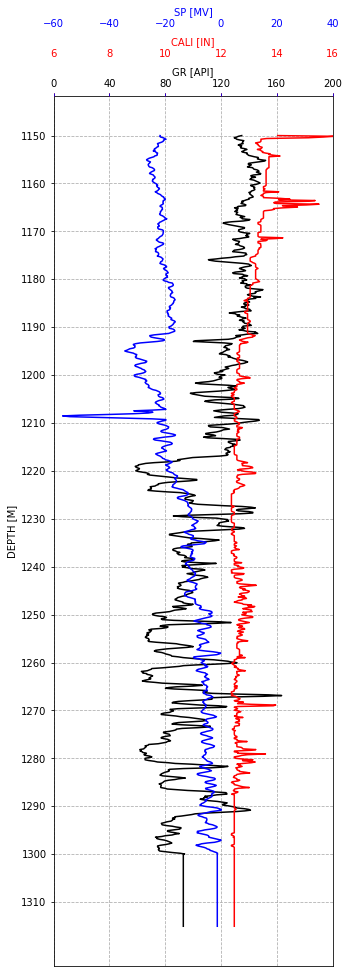

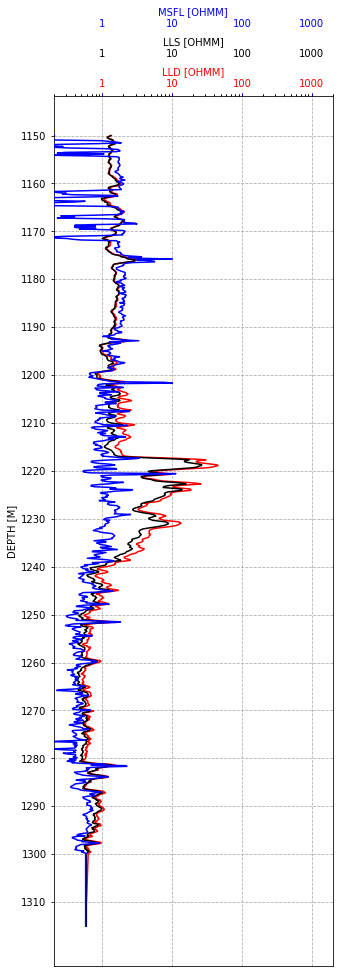

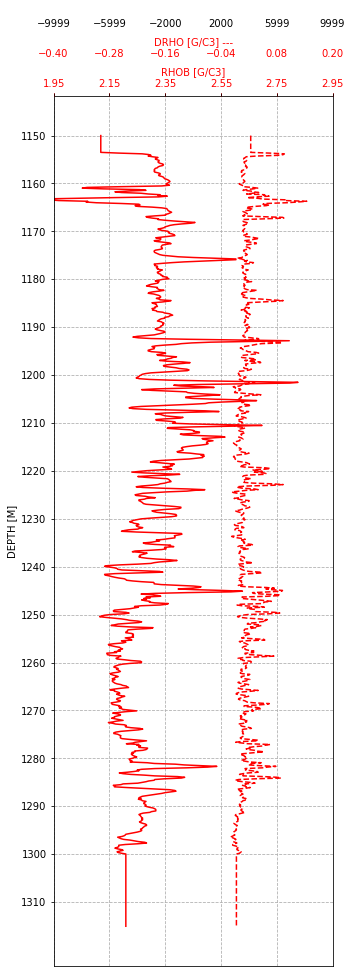

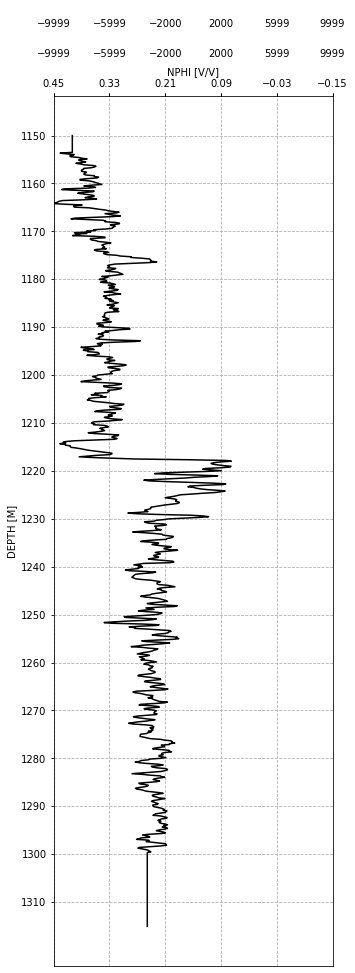

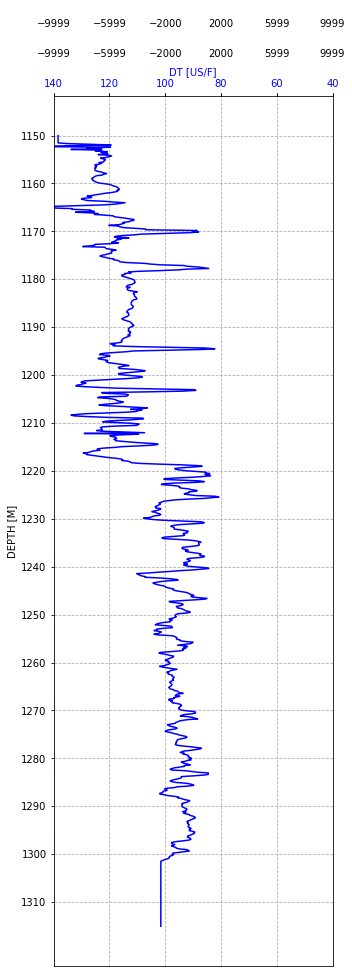

In [13]:
#GR, CALI, and SP logs
track(["GR [API]", "CALI [IN]", "SP [MV]"], depth, [gr, cali, sp], [[0,200],[6,16],[-60,40]])

#Resistivity logs (LLD, LLS, MSFL)
track(["LLD [OHMM]", "LLS [OHMM]", "MSFL [OHMM]"], depth, [lld, lls, msfl], [[.2,2000],[0.2,2000],[0.2,2000]])

#RHOB and DRHO
track(["RHOB [G/C3]", "DRHO [G/C3] ---", " "], depth, [rhob, drho, dummy1], [[1.95,2.95],[-.4,.2],[-9999,9999]])

#NPHI
track(["NPHI [V/V]", " ", " "], depth, [nphi, dummy1, dummy1], [[0.45,-.15],[-9999,9999],[-9999,9999]])

#DT
track(["DT [US/F]", " ", " "], depth, [dt, dummy1, dummy1], [[140,40],[-9999,9999],[-9999,9999]])

## GR, CALI and SP logs

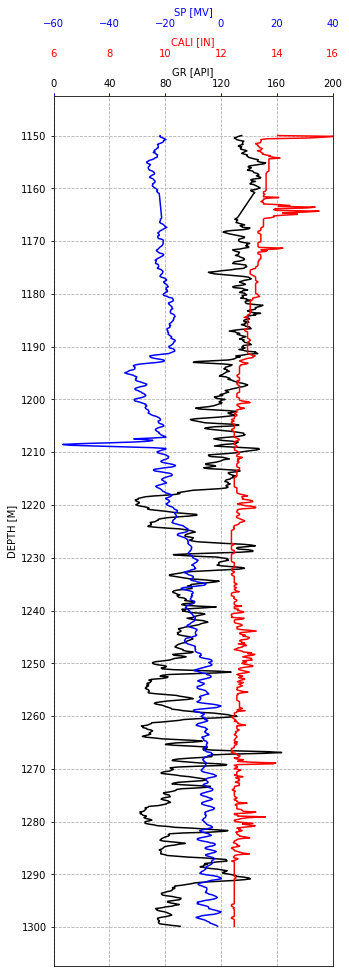

In [14]:
#GR, CALI, and SP logs
track(["GR [API]", "CALI [IN]", "SP [MV]"], qc_depth[ini:fin], [qc_gr[ini:fin], qc_cali[ini:fin], qc_sp[ini:fin]], [[0,200],[6,16],[-60,40]])

# Resistivity logs

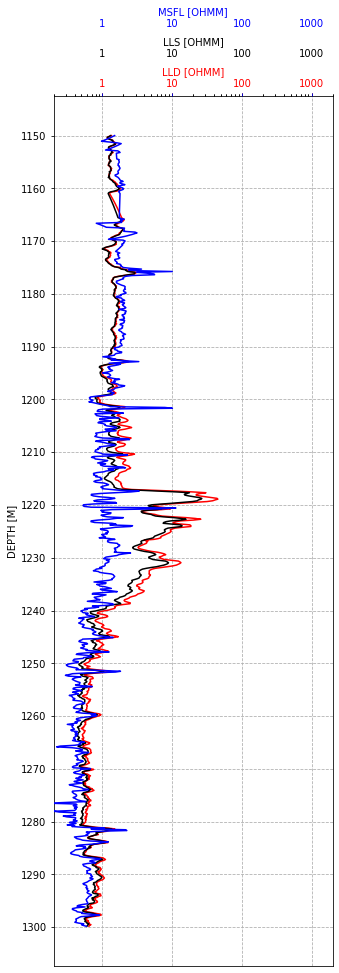

In [15]:
#Resistivity logs (LLD, LLS, MSFL)
track(["LLD [OHMM]", "LLS [OHMM]", "MSFL [OHMM]"], qc_depth[ini:fin], [qc_lld[ini:fin], qc_lls[ini:fin], qc_msfl[ini:fin]], [[.2,2000],[0.2,2000],[0.2,2000]])

Consider LLD as Rt

## RHOB and DRHO 

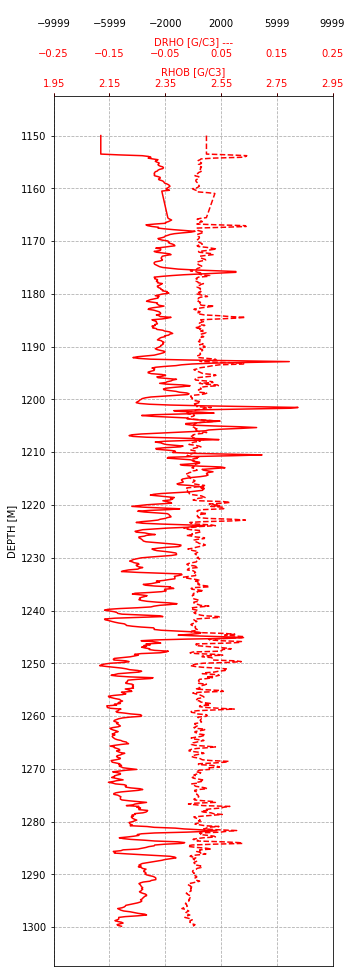

In [16]:
#RHOB and DRHO
track(["RHOB [G/C3]", "DRHO [G/C3] ---", " "], qc_depth[ini:fin], [qc_rhob[ini:fin], qc_drho[ini:fin], qc_dummy1[ini:fin]], [[1.95,2.95],[-.25,.25],[-9999,9999]])


## Neutron log

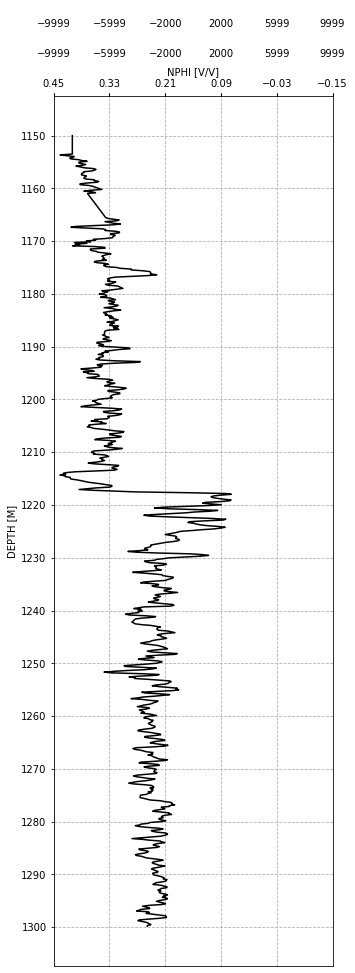

In [17]:
#NPHI
track(["NPHI [V/V]", " ", " "], qc_depth[ini:fin], [qc_nphi[ini:fin], qc_dummy1[ini:fin], qc_dummy1[ini:fin]], [[0.45,-.15],[-9999,9999],[-9999,9999]])

## DT

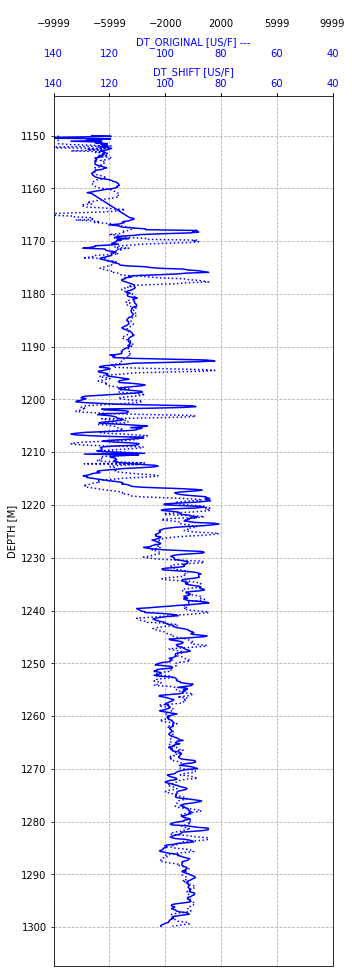

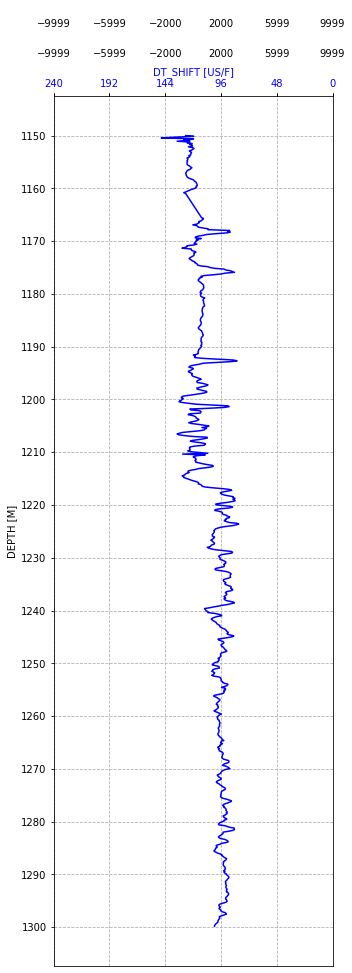

In [18]:
#DT SHIFT AND ORIGINAL
track(["DT_SHIFT [US/F]", "DT_ORIGINAL [US/F] ---", " "], qc_depth[ini:fin], [qc_dt[ini:fin], dt[ini:fin], qc_dummy1[ini:fin]], [[140,40],[140,40],[-9999,9999]])
track(["DT_SHIFT [US/F]", " ", " "], qc_depth[ini:fin], [qc_dt[ini:fin], qc_dummy1[ini:fin], qc_dummy1[ini:fin]], [[240,0],[-9999,9999],[-9999,9999]])

## GR and Vshale

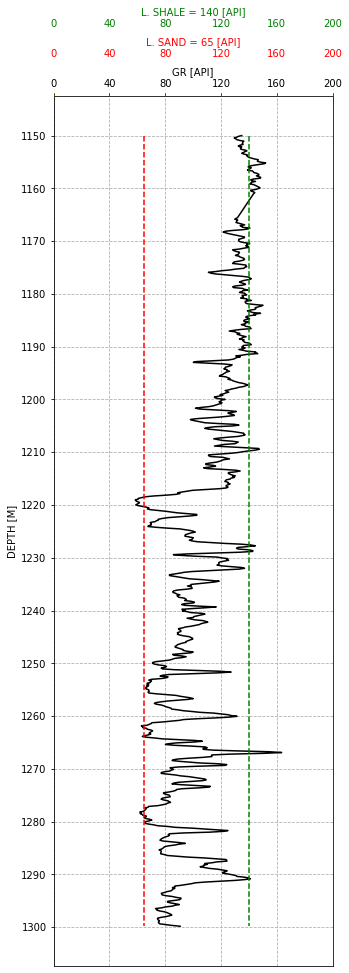

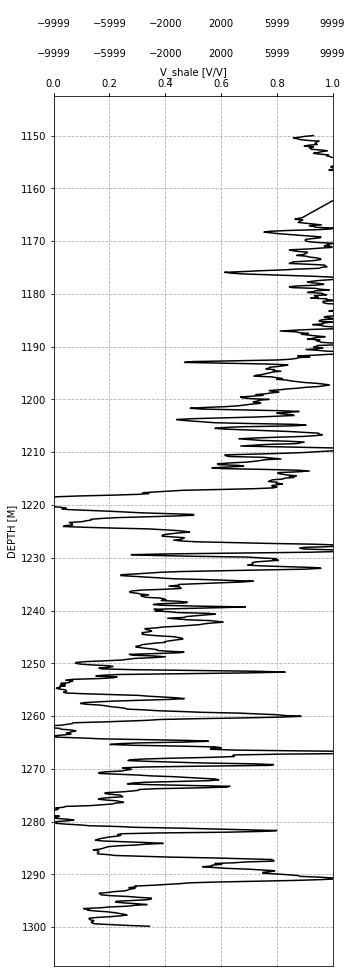

In [19]:
v_shale = copy.deepcopy(depth)
v_shale[:]=np.nan

v_shale[ini:fin] = VSHALE(qc_depth[ini:fin], qc_gr[ini:fin], qc_dummy1[ini:fin], 65, 140)

# Sonic Porosity

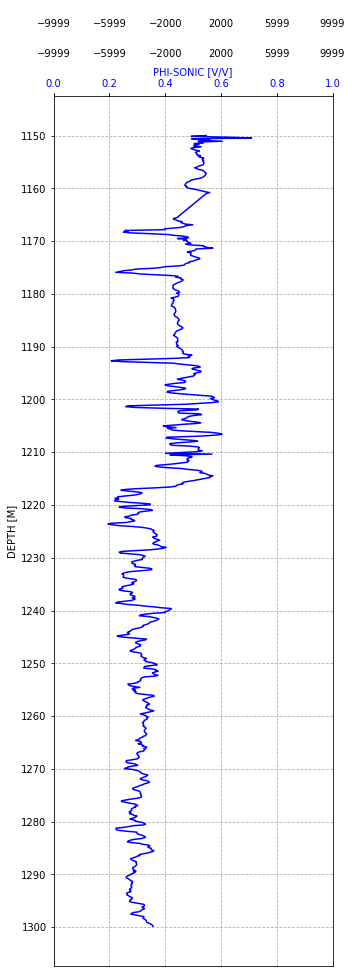

In [20]:
PHI_sonic = copy.deepcopy(depth)
PHI_sonic[:]=np.nan

PHI_sonic[ini:fin] = sonic_porosity(qc_depth[ini:fin], qc_dt[ini:fin], qc_dummy1[ini:fin])

# Density porosity

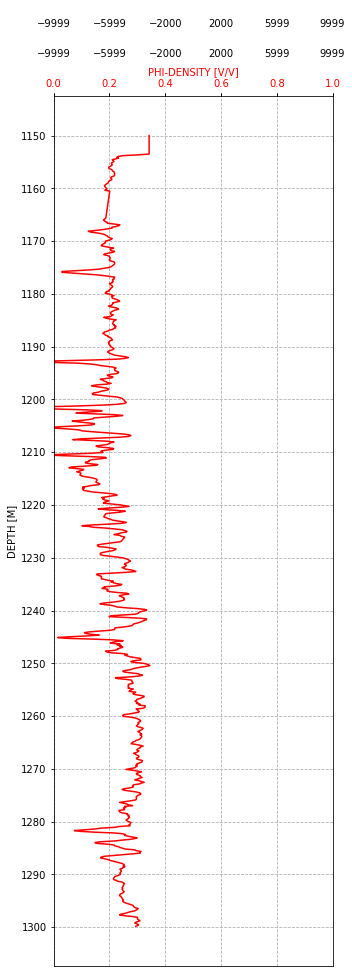

In [21]:
PHI_density = copy.deepcopy(depth)
PHI_density[:]=np.nan

PHI_density[ini:fin] = density_porosity(qc_depth[ini:fin], qc_rhob[ini:fin], qc_dummy1[ini:fin])

# Neutron porosity

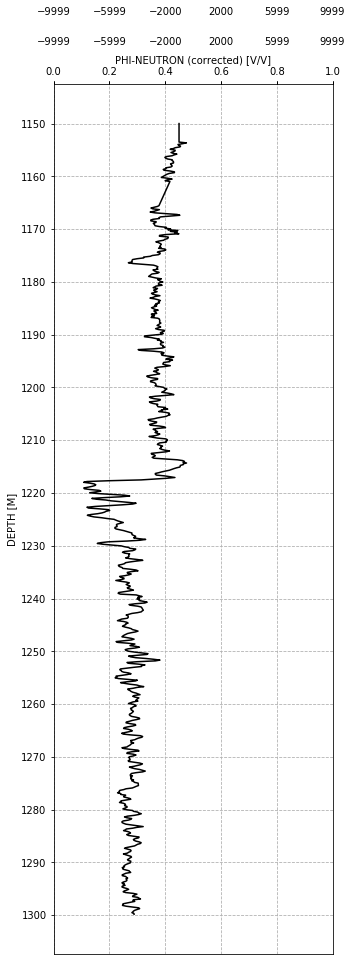

In [22]:
PHI_neutron = copy.deepcopy(depth)
PHI_neutron[:]=np.nan

PHI_neutron[ini:fin] = neutron_porosity(qc_depth[ini:fin], qc_nphi[ini:fin], qc_dummy1[ini:fin])

# Neutron-Density porosity

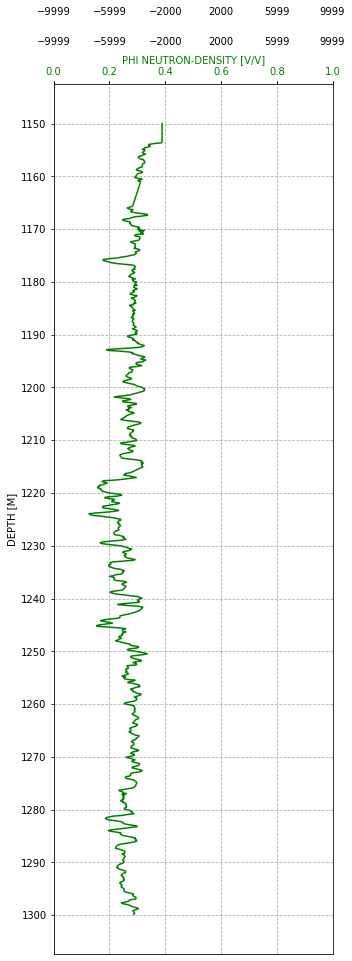

In [23]:
PHI_NeutDen = copy.deepcopy(depth)
PHI_NeutDen[:]=np.nan

PHI_NeutDen[ini:fin] = neutron_density_porosity(qc_depth[ini:fin], qc_nphi[ini:fin], qc_rhob[ini:fin], qc_dummy1[ini:fin])

# Total porosities

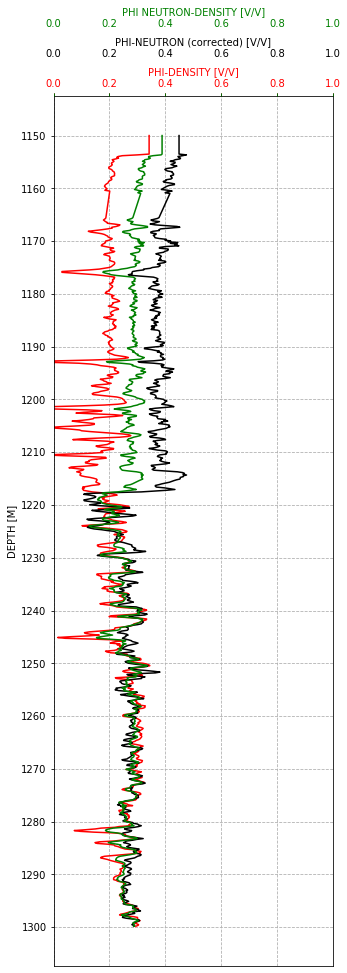

In [46]:
track(["PHI-DENSITY [V/V]", "PHI-NEUTRON (corrected) [V/V]", "PHI NEUTRON-DENSITY [V/V]"], qc_depth[ini:fin], [PHI_density[ini:fin], PHI_neutron[ini:fin], PHI_NeutDen[ini:fin]], [[0,1],[0,1],[0,1]])

# Neutron-Density logs

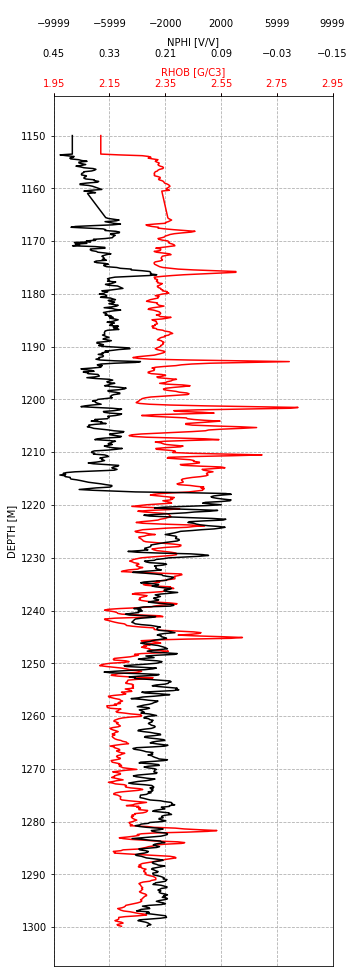

In [25]:
track(["RHOB [G/C3]", "NPHI [V/V]", " "], qc_depth[ini:fin], [qc_rhob[ini:fin], qc_nphi[ini:fin], qc_dummy1[ini:fin]], [[1.95,2.95],[.45,-.15],[-9999,9999]])

# Neutron-Density Chart

Text(0.5, 0, 'NPHI [V/V]')

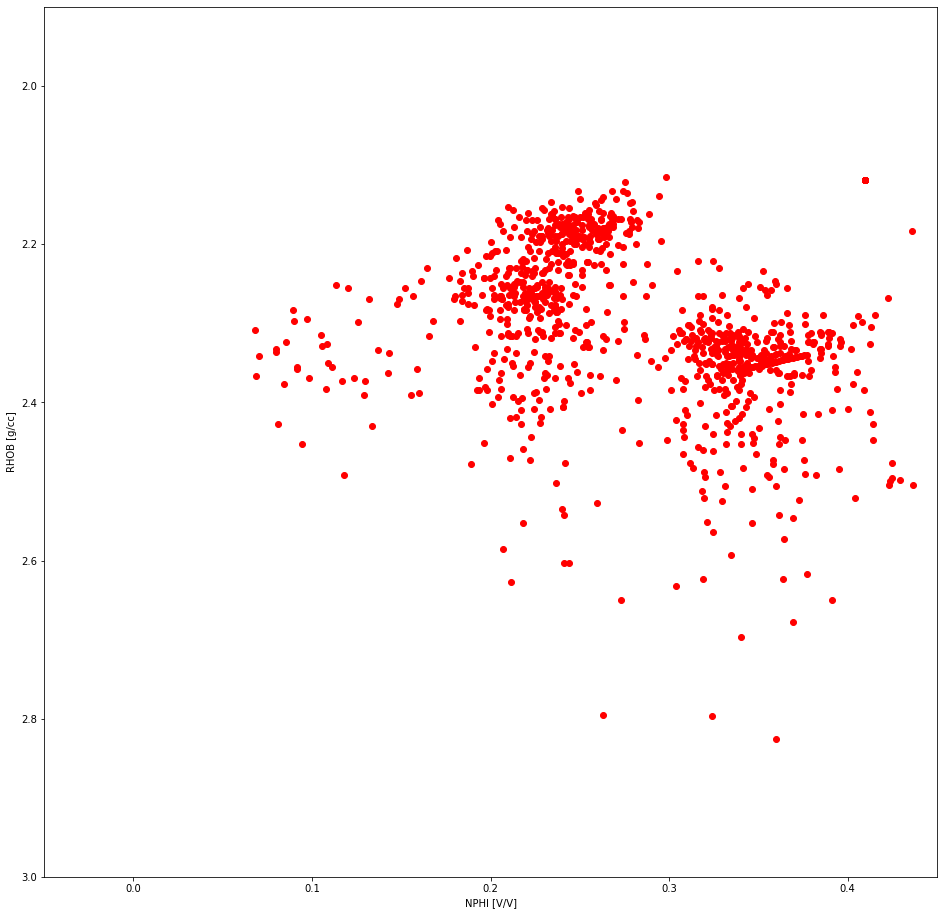

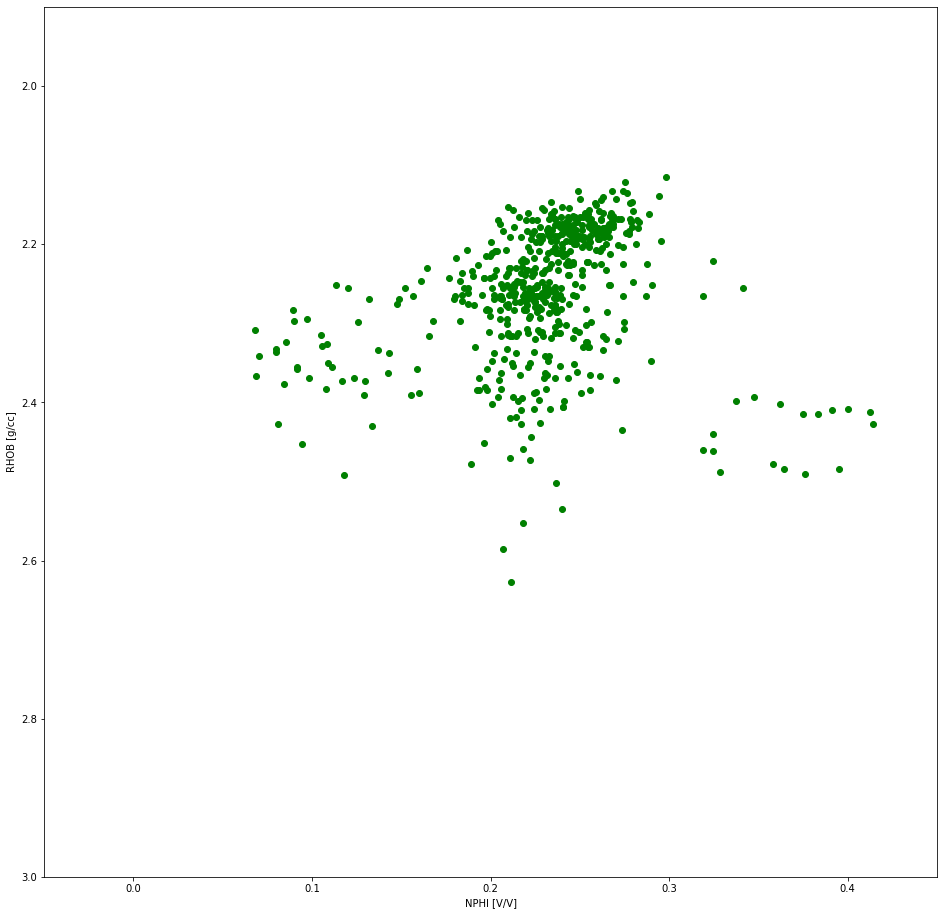

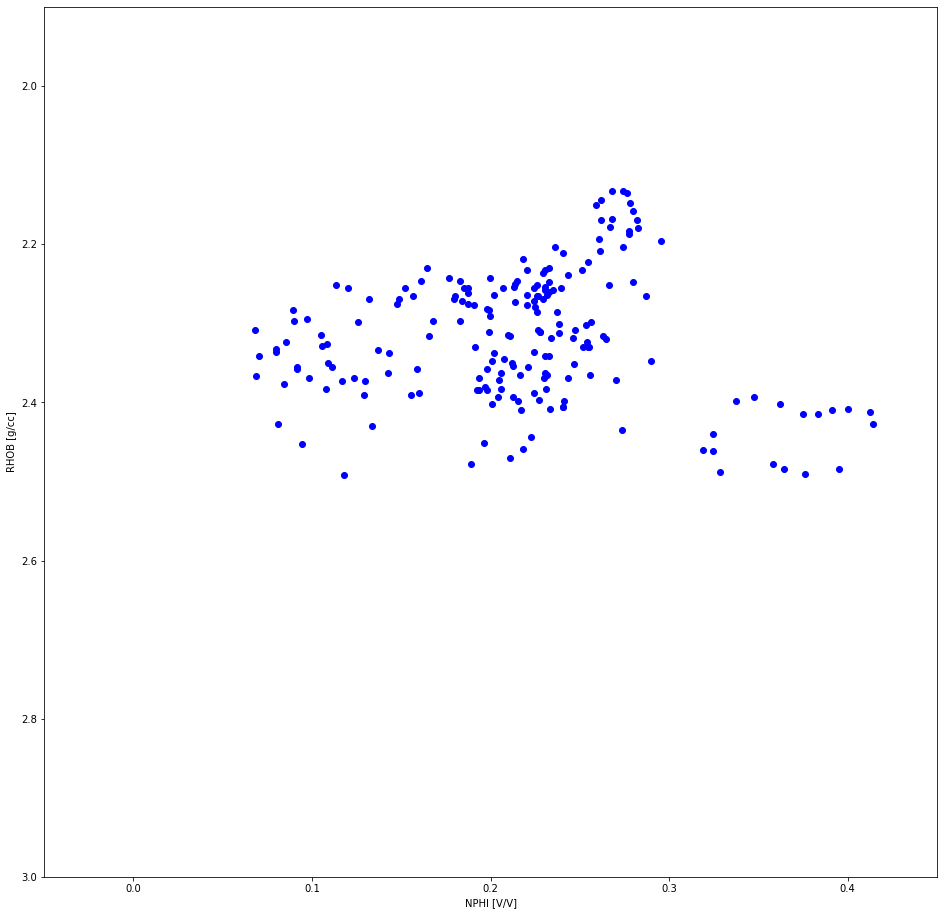

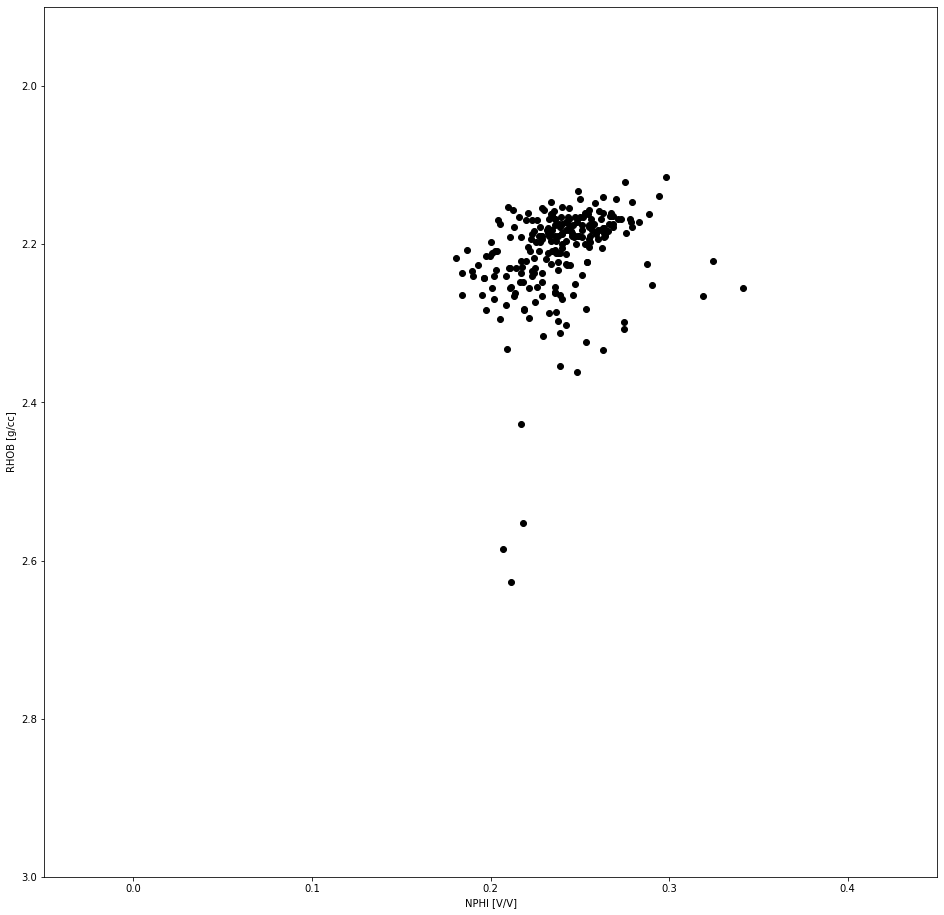

In [26]:
plt.figure(figsize=(16,16))          
plt.plot(qc_nphi[ini:fin], qc_rhob[ini:fin], 'o', color='r')
plt.gca().invert_yaxis()
plt.ylabel("RHOB [g/cc]")
plt.ylim([3.0, 1.9])
plt.xlim([-.05, .45])      #defining x axis limits
plt.xlabel('NPHI [V/V]')          #defining log label


Depth_ini1 = 1215    #Original min = 1150 [m]    ///    After tool pick-ups 1150
Depth_fin1 = 1300    #Original max = 1310 [m]    ///    After tool pick-ups 1300
(ini1,fin1)=plot_limits(depth,Depth_ini1,Depth_fin1)

plt.figure(figsize=(16,16))          
plt.plot(qc_nphi[ini1:fin1], qc_rhob[ini1:fin1], 'o', color='g')
plt.gca().invert_yaxis()
plt.ylabel("RHOB [g/cc]")
plt.ylim([3.0, 1.9])
plt.xlim([-.05, .45])      #defining x axis limits
plt.xlabel('NPHI [V/V]')          #defining log label

Depth_ini2 = 1215    #Original min = 1150 [m]    ///    After tool pick-ups 1150
Depth_fin2 = 1245    #Original max = 1310 [m]    ///    After tool pick-ups 1300
(ini2,fin2)=plot_limits(depth,Depth_ini2,Depth_fin2)

plt.figure(figsize=(16,16))          
plt.plot(qc_nphi[ini2:fin2], qc_rhob[ini2:fin2], 'o', color='b')
plt.gca().invert_yaxis()
plt.ylabel("RHOB [g/cc]")
plt.ylim([3.0, 1.9])
plt.xlim([-.05, .45])      #defining x axis limits
plt.xlabel('NPHI [V/V]')          #defining log label

Depth_ini3 = 1245    #Original min = 1150 [m]    ///    After tool pick-ups 1150
Depth_fin3 = 1280    #Original max = 1310 [m]    ///    After tool pick-ups 1300
(ini3,fin3)=plot_limits(depth,Depth_ini3,Depth_fin3)

plt.figure(figsize=(16,16))          
plt.plot(qc_nphi[ini3:fin3], qc_rhob[ini3:fin3], 'o', color='k')
plt.gca().invert_yaxis()
plt.ylabel("RHOB [g/cc]")
plt.ylim([3.0, 1.9])
plt.xlim([-.05, .45])      #defining x axis limits
plt.xlabel('NPHI [V/V]')          #defining log label

# Effective porosity

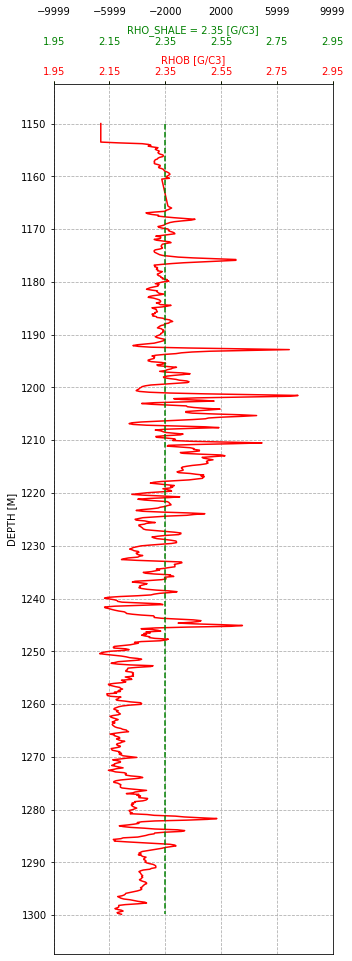

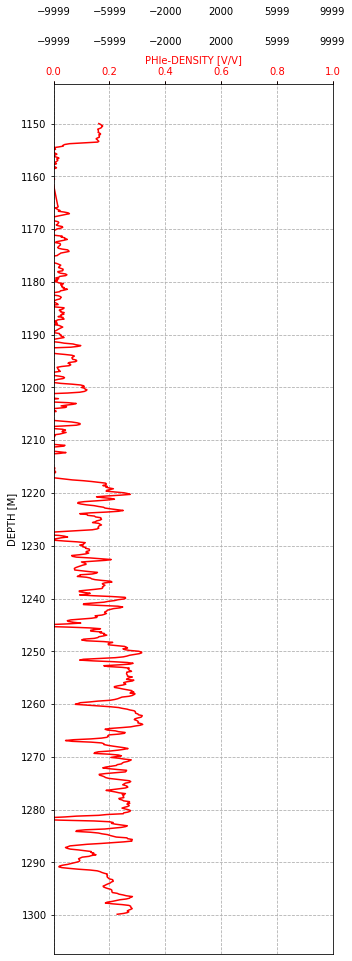

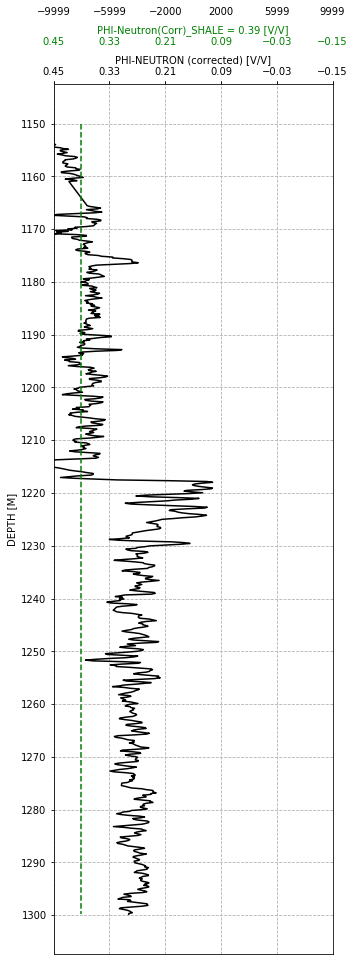

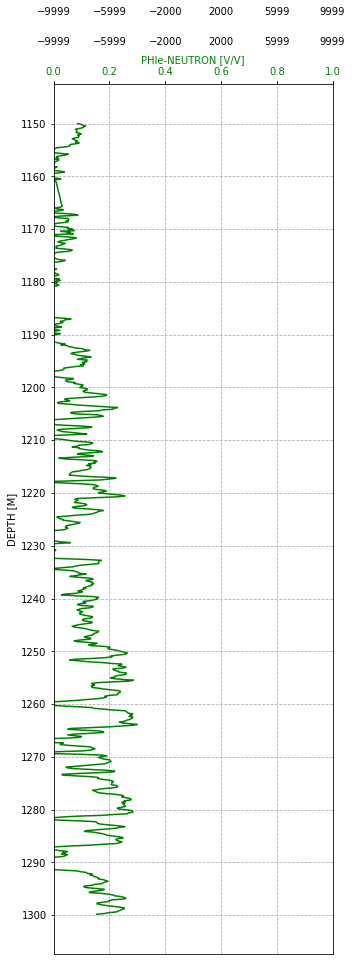

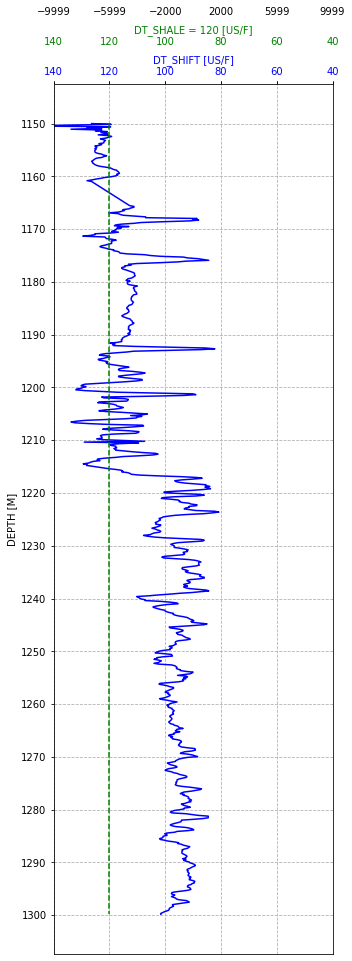

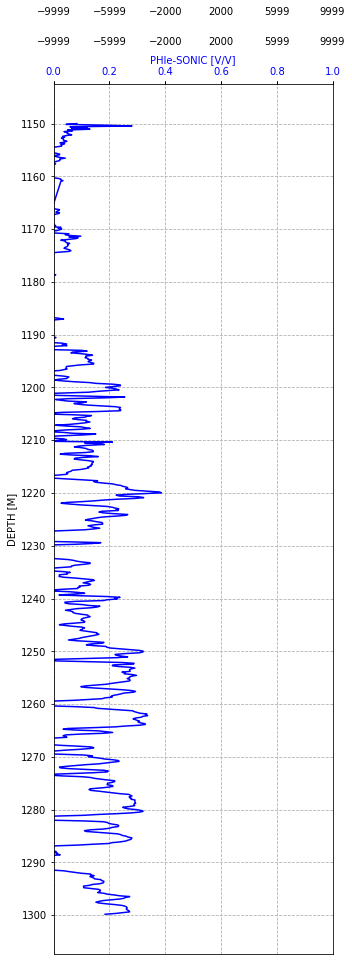

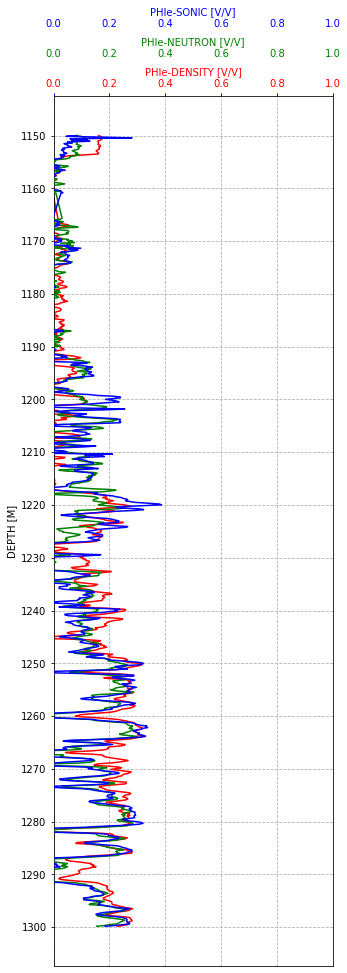

In [27]:
#Density log
RHO_s = copy.deepcopy(depth)
RHO_s[:]=2.35

track(["RHOB [G/C3]", "RHO_SHALE = 2.35 [G/C3]", ""], qc_depth[ini:fin], [qc_rhob[ini:fin], RHO_s[ini:fin],qc_dummy1[ini:fin]], [[1.95,2.95],[1.95,2.95],[-9999,9999]])

PHIe_RHO = copy.deepcopy(depth)
PHIe_RHO[:]=np.nan
PHIe_RHO[ini:fin] = PHI_density[ini:fin] - v_shale[ini:fin]*((2.65-2.35)/(2.65-1.1))

track(["PHIe-DENSITY [V/V]", " ", ""], qc_depth[ini:fin], [PHIe_RHO[ini:fin], qc_dummy1[ini:fin],qc_dummy1[ini:fin]], [[0,1],[-9999,9999],[-9999,9999]])

#Neutron log
NPHIc_s = copy.deepcopy(depth)
NPHIc_s[:]=0.39

track(["PHI-NEUTRON (corrected) [V/V]", "PHI-Neutron(Corr)_SHALE = 0.39 [V/V]", ""], qc_depth[ini:fin], [PHI_neutron[ini:fin], NPHIc_s[ini:fin],qc_dummy1[ini:fin]], [[0.45,-0.15],[0.45,-0.15],[-9999,9999]])

PHIe_Neut = copy.deepcopy(depth)
PHIe_Neut[:]=np.nan
PHIe_Neut[ini:fin] = PHI_neutron[ini:fin]-(v_shale[ini:fin]*0.39)

track(["PHIe-NEUTRON [V/V]", " ", ""], qc_depth[ini:fin], [PHIe_Neut[ini:fin], qc_dummy1[ini:fin],qc_dummy1[ini:fin]], [[0,1],[-9999,9999],[-9999,9999]])


#Sonic log
DT_s = copy.deepcopy(depth)
DT_s[:]=120

track(["DT_SHIFT [US/F]", "DT_SHALE = 120 [US/F]", ""], qc_depth[ini:fin], [qc_dt[ini:fin], DT_s[ini:fin],qc_dummy1[ini:fin]], [[140,40],[140,40],[-9999,9999]])

PHIe_DT = copy.deepcopy(depth)
PHIe_DT[:]=np.nan
PHIe_DT[ini:fin] = PHI_sonic[ini:fin] - v_shale[ini:fin]*((55.5-120)/(55.5-185))

track(["PHIe-SONIC [V/V]", " ", ""], qc_depth[ini:fin], [PHIe_DT[ini:fin], qc_dummy1[ini:fin],qc_dummy1[ini:fin]], [[0,1],[-9999,9999],[-9999,9999]])


track(["PHIe-DENSITY [V/V]", "PHIe-NEUTRON [V/V]", "PHIe-SONIC [V/V]"], qc_depth[ini:fin], [PHIe_RHO[ini:fin], PHIe_Neut[ini:fin],PHIe_DT[ini:fin]], [[0,1],[0,1],[0,1]])

# Rwa

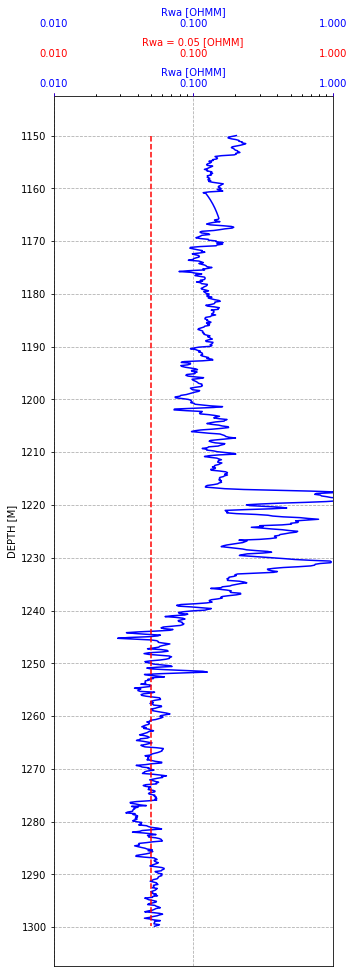

In [38]:
Rt = qc_lld

m=2

Rwa = copy.deepcopy(depth)
Rwa[:]=np.nan

Rwa[ini:fin] = Rt[ini:fin]*np.power(PHI_NeutDen[ini:fin],m)

Rwa_line = copy.deepcopy(depth)
Rwa_line[:]=0.05

track(["Rwa [OHMM]", "Rwa = 0.05 [OHMM]", "Rwa [OHMM]"], qc_depth[ini:fin], [Rwa[ini:fin], Rwa_line[ini:fin],qc_dummy1[ini:fin]], [[0.01,1],[0.01,1],[.01,1]])


# Water Saturation

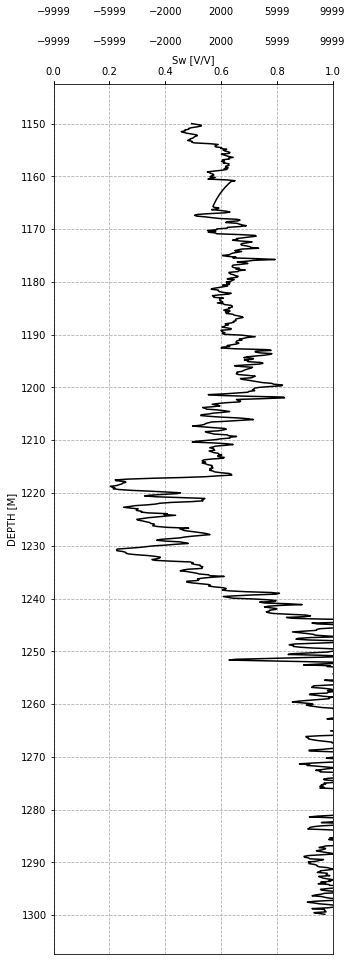

In [44]:
Rwa_v = 0.05
Rt = qc_lld

a = 1
m = 2
n = 2

F=copy.deepcopy(depth)
F[:]=np.nan
F[ini:fin] = a/np.power(PHI_NeutDen[ini:fin],m)

Sw=copy.deepcopy(depth)
Sw[:]=np.nan
Sw[ini:fin] = np.sqrt(F[ini:fin]*(Rwa_v/Rt[ini:fin]))

track(["Sw [V/V]", "", ""], qc_depth[ini:fin], [Sw[ini:fin], qc_dummy1[ini:fin],qc_dummy1[ini:fin]], [[0,1],[-9999,9999],[-9999,9999]])
#fill([" ", " ", "Sw [V/V]"], qc_depth[ini:fin], [qc_dummy1[ini:fin], qc_dummy1[ini:fin], Sw[ini:fin]], [[-9999,9999],[-9999,9999],[0,1]])

In [45]:
#fill(["PHI-SONIC [%]", "PHI-DENSITY [%]", "V_shale [%] ---"], qc_depth[ini:fin], [PHI_sonic[ini:fin], PHI_density[ini:fin], v_shale[ini:fin]], [[0,1],[0,1],[0,1]])

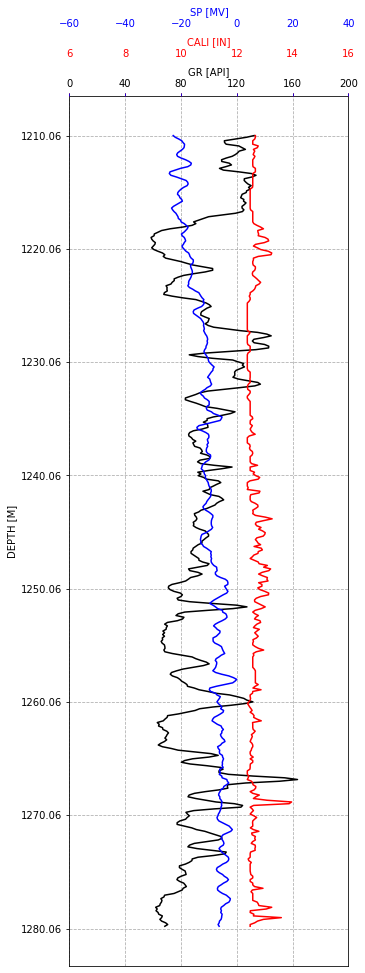

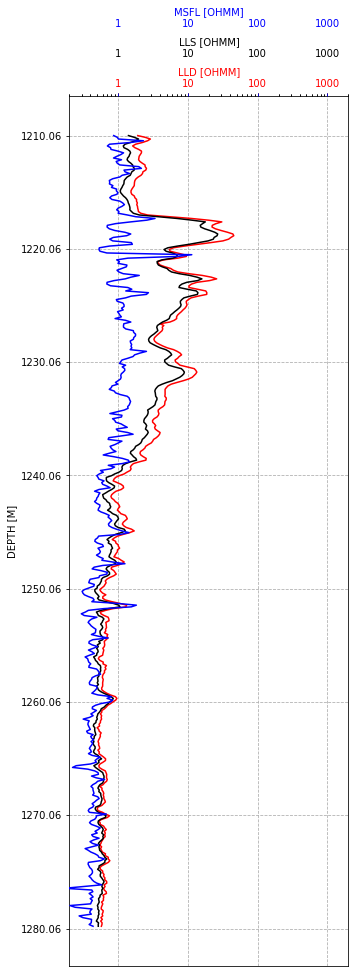

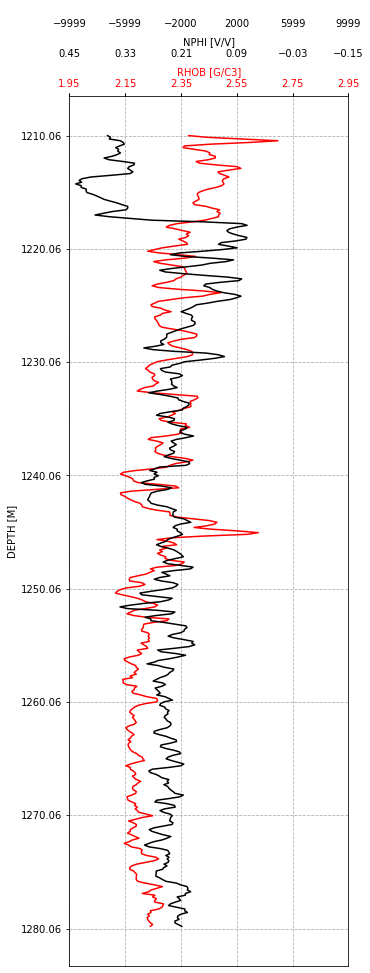

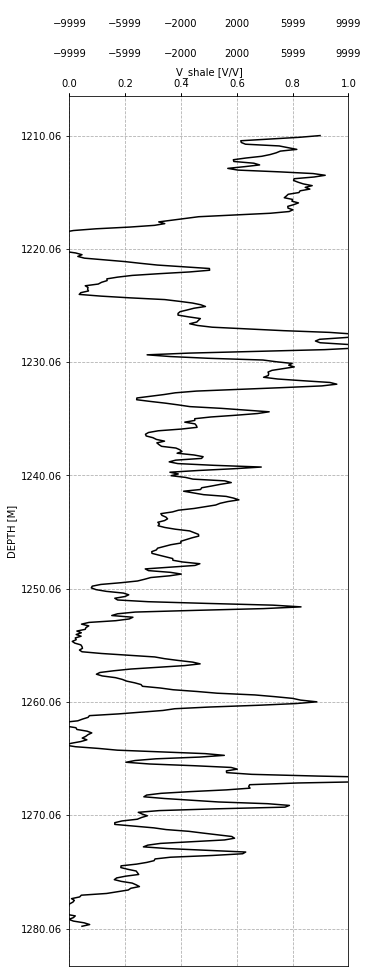

In [48]:
Depth_inix = 1210    #Original min = 1150 [m]    ///    After tool pick-ups 1150
Depth_finx = 1280    #Original max = 1310 [m]    ///    After tool pick-ups 1300
(inix,finx)=plot_limits(depth,Depth_inix,Depth_finx)

track(["GR [API]", "CALI [IN]", "SP [MV]"], qc_depth[inix:finx], [qc_gr[inix:finx], qc_cali[inix:finx], qc_sp[inix:finx]], [[0,200],[6,16],[-60,40]])
track(["LLD [OHMM]", "LLS [OHMM]", "MSFL [OHMM]"], qc_depth[inix:finx], [qc_lld[inix:finx], qc_lls[inix:finx], qc_msfl[inix:finx]], [[.2,2000],[0.2,2000],[0.2,2000]])
track(["RHOB [G/C3]", "NPHI [V/V]", " "], qc_depth[inix:finx], [qc_rhob[inix:finx], qc_nphi[inix:finx], qc_dummy1[inix:finx]], [[1.95,2.95],[.45,-.15],[-9999,9999]])
track(["V_shale [V/V]", " ", " "], qc_depth[inix:finx], [v_shale[inix:finx], qc_dummy1[inix:finx], qc_dummy1[inix:finx]], [[0,1],[-9999,9999],[-9999,9999]])